# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## PyTorch Basic Tensor Manipulation

<br/>

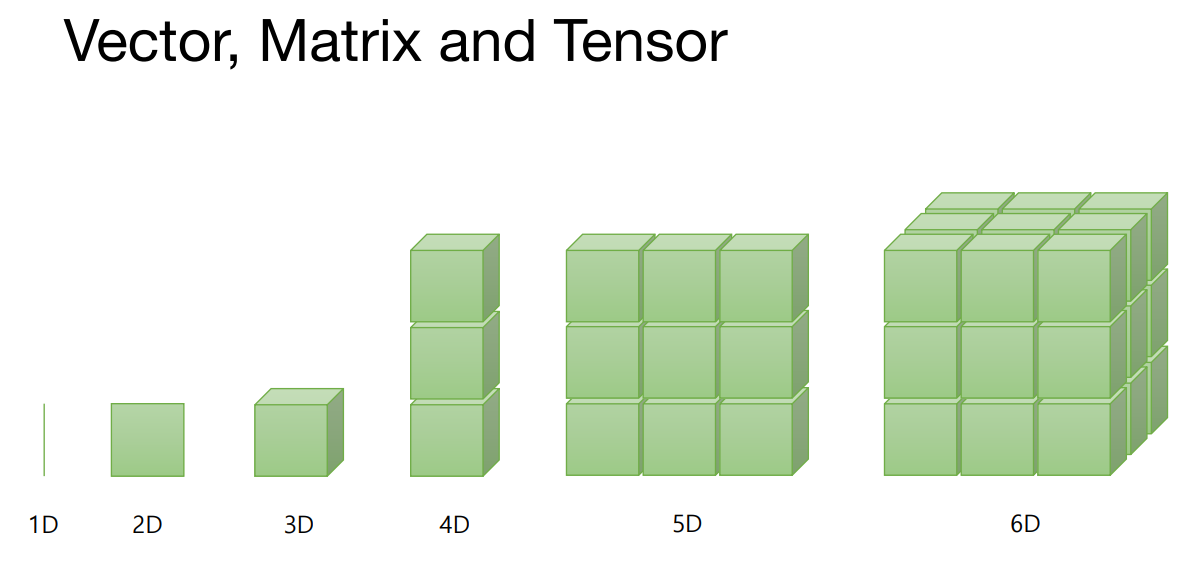

<br/>

> 2D Tensor (Typical Simple Setting)
> - |t| = (batch size, dim)

> 3D Tensor (Typical Computer Vision)
> - |t| = (batch size, width, height)

> 3D Tensor (Typical Natural Language Processing)
> - |t| = (batch size, lenght, dim)

In [1]:
import numpy as np
import torch

<br/>

### Numpy 와 PyTorch

<hr/>

#### 1D Array with Numpy

In [2]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print("Rank of t:", t.ndim)     # 차원
print("Shape of t:", t.shape)   # 모양

Rank of t: 1
Shape of t: (7,)


In [5]:
print("t[0] t[1] t[-1] =", t[0], t[1], t[-1])
print("t[2:5] t[4:-1] =", t[2:5], t[4:-1])
print("t[:2] t[3:] =", t[:2], t[3:])

t[0] t[1] t[-1] = 0.0 1.0 6.0
t[2:5] t[4:-1] = [2. 3. 4.] [4. 5.]
t[:2] t[3:] = [0. 1.] [3. 4. 5. 6.]


<br/>

#### 2D Array with Numpy

In [6]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [7]:
print("Rank of t:", t.ndim)     # 차원
print("Shape of t:", t.shape)   # 모양

Rank of t: 2
Shape of t: (4, 3)


<br/>

#### 1D Array with PyTorch

In [8]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [10]:
print("Rank of t:", t.ndim)     # 차원
print("Shape of t:", t.shape)   # 모양
print("Shape of t:", t.size())   # 모양

Rank of t: 1
Shape of t: torch.Size([7])
Shape of t: torch.Size([7])


In [11]:
print("t[0] t[1] t[-1] =", t[0], t[1], t[-1])
print("t[2:5] t[4:-1] =", t[2:5], t[4:-1])
print("t[:2] t[3:] =", t[:2], t[3:])

t[0] t[1] t[-1] = tensor(0.) tensor(1.) tensor(6.)
t[2:5] t[4:-1] = tensor([2., 3., 4.]) tensor([4., 5.])
t[:2] t[3:] = tensor([0., 1.]) tensor([3., 4., 5., 6.])


<br/>

#### 2D Array with PyTorch

In [12]:
t = torch.FloatTensor([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [13]:
print("Rank of t:", t.ndim)     # 차원
print("Shape of t:", t.size())  # 모양
print(t[:, 1])                  # 2번째 열만 가져오기
print(t[:, 1].size())           # size
print(t[:, :-1])                # 슬라이싱으로 열 정보 가져오기

Rank of t: 2
Shape of t: torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


<br/>

#### Broadcasting

In [18]:
# Same Shape
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [19]:
# Vector + Scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3])       # 3- > [[3, 3]]
print(m1 + m2)

tensor([[4., 5.]])


In [20]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])     # [[1, 2], [1, 2]]
m2 = torch.FloatTensor([[3], [4]])   # [[3, 3], [4, 4]]
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


<br/>

#### Multiplication  VS  Matrix Mulitpulication

In [24]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])     
m2 = torch.FloatTensor([[1], [2]])     
print("Shape of Matrix 1:", m1.shape) # 2 x 2
print("Shape of Matrix 2:", m2.shape) # 2 x 1
print(m1.matmul(m2))   # 2 x 1
print(m1 * m2)         # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1: torch.Size([2, 2])
Shape of Matrix 2: torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


<br/>

#### Mean

In [25]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [26]:
t = torch.LongTensor([1, 2])
try:
    print(t.mean())
except Exception as exc:
    print(exc)

mean(): input dtype should be either floating point or complex dtypes. Got Long instead.


In [27]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [28]:
print(t.mean())
print(t.mean(dim=0))     # 열 방향
print(t.mean(dim=1))     # 행 방향
print(t.mean(dim=-1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


<br/>

#### Sum

In [29]:
t = torch.FloatTensor([[1, 2], [3, 4]])

print(t.sum())
print(t.sum(dim=0))     # 열 방향
print(t.sum(dim=1))     # 행 방향
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


<br/>

#### Max & Argmax

- max는 가장 큰 수를 리턴해준다.

- argmax는 가장 큰 값의 인덱스 값을 리턴해준다.

In [33]:
t = torch.FloatTensor([[1, 2], [3, 4]])

print(t.max())
print(t.max(dim=0))

print()
print("Max:", t.max(dim=0)[0])
print("Argmax:", t.max(dim=0)[1])

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))

Max: tensor([3., 4.])
Argmax: tensor([1, 1])


In [34]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


<br/>

#### View(Reshape)

In [4]:
t = np.array([
           [[0,1,2], 
            [3,4,5]],
              
            [[6,7,8], 
             [9,10,11]]
             ])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [5]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [6]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


<br/>

#### Squeeze

In [7]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [8]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


<br/>

#### Unsqueeze

In [9]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [11]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [12]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [13]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [14]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


<br/>

#### Type Casting

In [15]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [16]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [17]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [18]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


<br/>

#### Concatenate

In [19]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [20]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


<br/>

#### Stacking

In [21]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [23]:
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [24]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


<br/>

#### Stacking

In [25]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [26]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


<br/>

#### In-place Operation

In [27]:
x = torch.FloatTensor([[1,2], [3,4]])
print(x.mul(2.))
print(x)
print(x.mul_(2.))   # '_' 하나로 x의 결과값을 x에 저장함
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
